In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from seaborn import regplot

# (A)

In [2]:
df = pd.read_csv("./Collinearity.csv")
df.head()

,horsepower,tank,mpg
0,130.0,13.0,18.0
1,165.0,16.5,15.0
2,150.0,15.0,18.0
3,150.0,15.0,16.0
4,140.0,14.0,17.0


C:\Users\rileyma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


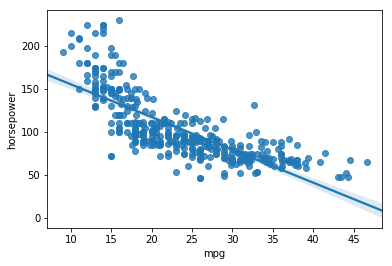

In [3]:
regplot(x='mpg',y='horsepower',data=df)

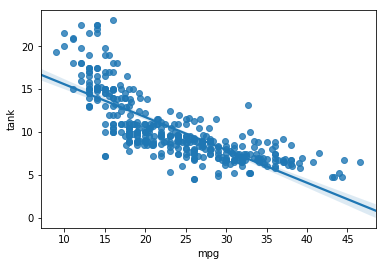

In [4]:
regplot(x='mpg',y='tank',data=df)

# (B)

In [5]:
feature_name=[]
R2=[]
target = df.mpg
for k in range(2):
    lr = LinearRegression()
    feature_name.append(df.columns[k])
    feature = df.iloc[:,k]
    lr.fit(feature.values.reshape(-1,1),target)
    R2.append(lr.score(feature.values.reshape(-1,1),target))
    
error = pd.DataFrame()
error['Feature'] = feature_name
error['Rsquared'] = R2

error.sort_values('Rsquared', ascending=False).round(5)

,Feature,Rsquared
0,horsepower,0.60532
1,tank,0.60428


In [6]:
target = df.mpg
lr = LinearRegression()
feature = df.horsepower
lr.fit(feature.values.reshape(-1,1),target)
lr.score(feature.values.reshape(-1,1),target)

0.6053238956651578

In [7]:
target = df.mpg
lr = LinearRegression()
feature = df.tank
lr.fit(feature.values.reshape(-1,1),target)
lr.score(feature.values.reshape(-1,1),target)

0.6042828980897043

In [8]:
coef = lr.coef_
coef

array([-1.5823186])

# (C)

In [9]:
features = df.drop('mpg',axis=1)
targets = df.mpg

In [10]:
lr = LinearRegression()
lr.fit(features,targets)
coef = lr.coef_
coef = pd.Series(coef, index=features.columns)
coef.sort_values(ascending=False)
lr.score(features,targets).round(3)

0.605

# (D)

In [11]:
df.corr()

,horsepower,tank,mpg
horsepower,1.000000,0.999140,-0.778026
tank,0.999140,1.000000,-0.777356
mpg,-0.778026,-0.777356,1.000000


In [12]:
df.tail(5)

,horsepower,tank,mpg
392,120.0,10.0,16.0
393,120.0,11.0,16.0
394,120.0,12.0,16.0
395,120.0,13.0,16.0
396,120.0,14.0,16.0


# (E)

#### There isn't a strong relationship between tank size and mpg. When holding horsepower constant, tank size does not matter. Multiple linear regression coefficients consdiers effects of each feature holding all other constants.